<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Nhập-thư-viện-và-định-nghĩa-hàm-hữu-dụng" data-toc-modified-id="Nhập-thư-viện-và-định-nghĩa-hàm-hữu-dụng-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Nhập thư viện và định nghĩa hàm hữu dụng</a></span></li><li><span><a href="#Tải-dữ-liệu" data-toc-modified-id="Tải-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tải dữ liệu</a></span></li><li><span><a href="#Tiền-xử-lý" data-toc-modified-id="Tiền-xử-lý-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tiền xử lý</a></span></li><li><span><a href="#Bước-1:-Tạo-các-mô-hình-univariate" data-toc-modified-id="Bước-1:-Tạo-các-mô-hình-univariate-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bước 1: Tạo các mô hình univariate</a></span></li><li><span><a href="#Bước-2:-Chọn-feature-tốt-nhất" data-toc-modified-id="Bước-2:-Chọn-feature-tốt-nhất-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bước 2: Chọn feature tốt nhất</a></span></li><li><span><a href="#Bước-3:-Thêm-lần-lượt-các-feature" data-toc-modified-id="Bước-3:-Thêm-lần-lượt-các-feature-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bước 3: Thêm lần lượt các feature</a></span></li><li><span><a href="#Bước-4:-Xóa-các-feature-có-p-value->-0.1-(từ-model)" data-toc-modified-id="Bước-4:-Xóa-các-feature-có-p-value->-0.1-(từ-model)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bước 4: Xóa các feature có p-value &gt; 0.1 (từ model)</a></span></li><li><span><a href="#Bước-5:-Xóa-các-feature-có-VIF->-3-(từ-tập-train)" data-toc-modified-id="Bước-5:-Xóa-các-feature-có-VIF->-3-(từ-tập-train)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bước 5: Xóa các feature có VIF &gt; 3 (từ tập train)</a></span></li><li><span><a href="#Bước-6:-Xóa-các-dữ-liệu-(hàng)-có-Cook’s-D-value->-1-(từ-tập-train)" data-toc-modified-id="Bước-6:-Xóa-các-dữ-liệu-(hàng)-có-Cook’s-D-value->-1-(từ-tập-train)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bước 6: Xóa các dữ liệu (hàng) có Cook’s D value &gt; 1 (từ tập train)</a></span></li><li><span><a href="#Bước-7:-Test" data-toc-modified-id="Bước-7:-Test-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Bước 7: Test</a></span></li></ul></div>

# Nhập thư viện và định nghĩa hàm hữu dụng

In [1]:
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
def lat_to_x(lat):
    return (25.6 - lat) / 0.025

In [3]:
def lon_to_y(lon):
    return (lon - 100.1) / 0.025

In [4]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    rbar2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return rbar2

# Tải dữ liệu

In [5]:
train_data = pd.read_csv('data/train.csv')
train_data

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
0,1/1/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,4.722948,4.761801,4.804577,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
1,1/2/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,7.789521,7.800428,7.796861,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
2,1/3/2019,21.0491,105.8831,41.310400,NVC,0,0,0,0,0,...,334.620723,9.141778,8.949080,8.838265,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
3,1/4/2019,21.0491,105.8831,39.379204,NVC,0,0,0,0,0,...,232.602795,11.897894,11.879602,11.857450,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
4,1/5/2019,21.0491,105.8831,39.901879,NVC,0,0,0,0,0,...,296.998407,11.874306,11.914230,11.922872,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,0,0,0,0,0,...,606.885986,2.117986,2.249595,2.854099,3864.637722,2794.262842,2051.262221,246.162011,150.477873,94.356435
4883,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,0,0,0,0,0,...,346.317471,6.983771,7.294758,8.144295,3864.637722,2794.262842,2051.262221,246.162011,150.477873,94.356435
4884,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,0,0,0,0,0,...,346.317471,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,150.477873,94.356435
4885,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,0,0,0,0,0,...,534.333673,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,150.477873,94.356435


In [6]:
direction_data = pd.read_csv('data/direction.csv')
direction_data

,feature,direction
0,Shrubs_3000,0
1,Shrubs_6000,0
2,Shrubs_9000,0
3,Herbaceous_vegetation_3000,0
4,Herbaceous_vegetation_6000,0
...,...,...
61,road_density_6000,1
62,road_density_9000,1
63,population_density_3000,1
64,population_density_6000,1


# Tiền xử lý

In [7]:
# Xoá dữ liệu bị mất
train_data.dropna(subset=['NO2'], inplace=True)
train_data

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
2,1/3/2019,21.0491,105.8831,41.310400,NVC,0,0,0,0,0,...,334.620723,9.141778,8.949080,8.838265,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
3,1/4/2019,21.0491,105.8831,39.379204,NVC,0,0,0,0,0,...,232.602795,11.897894,11.879602,11.857450,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
4,1/5/2019,21.0491,105.8831,39.901879,NVC,0,0,0,0,0,...,296.998407,11.874306,11.914230,11.922872,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
5,1/6/2019,21.0491,105.8831,30.008246,NVC,0,0,0,0,0,...,269.357956,9.857271,9.888818,9.873468,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
6,1/7/2019,21.0491,105.8831,38.881163,NVC,0,0,0,0,0,...,415.254027,13.722359,13.686996,13.688688,3058.012410,2518.368833,2177.353131,65.648988,78.090741,77.082822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,0,0,0,0,0,...,606.885986,2.117986,2.249595,2.854099,3864.637722,2794.262842,2051.262221,246.162011,150.477873,94.356435
4883,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,0,0,0,0,0,...,346.317471,6.983771,7.294758,8.144295,3864.637722,2794.262842,2051.262221,246.162011,150.477873,94.356435
4884,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,0,0,0,0,0,...,346.317471,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,150.477873,94.356435
4885,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,0,0,0,0,0,...,534.333673,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,150.477873,94.356435


In [8]:
train_data['NO2'].sort_values()

1975         0.000000
1876         0.000000
1875         0.000000
1874         0.000000
1873         0.000000
            ...      
22          95.192095
3574        97.678375
3573       104.062462
754      37321.263950
895     651519.076000
Name: NO2, Length: 4849, dtype: float64

In [9]:
# Bỏ outlier
train_data = train_data.query("NO2 <= 200")

# Bước 1: Tạo các mô hình univariate

In [10]:
def get_model_and_r2(features, X=None, y=None):
    if X is None:
        X = train_data[features]
    if y is None:
        y = train_data['NO2']
    lr = LinearRegression().fit(X, y)
    y_pred = lr.predict(X)
    adjusted_r2 = adjusted_r2_score(y, y_pred, len(features))
    return lr, adjusted_r2

In [11]:
features = direction_data['feature']

In [12]:
univariate_models = {}
model_infos = []

for feature in features:
    direction = direction_data[direction_data['feature'] == feature]['direction'].to_numpy()[0]
    X = train_data[feature].to_numpy().reshape(-1, 1)
    y = train_data['NO2']
    lr, adjusted_r2 = get_model_and_r2([feature], X, y)
    univariate_models[feature] = lr
    model_infos.append([feature, direction, lr.coef_[0], lr.intercept_, adjusted_r2])
    
model_info_df = pd.DataFrame(model_infos, columns=['feature', 'direction', 'a', 'b', 'adjusted_r2'])
model_info_df

,feature,direction,a,b,adjusted_r2
0,Shrubs_3000,0,0.000000,25.728862,-0.000206
1,Shrubs_6000,0,0.000000,25.728862,-0.000206
2,Shrubs_9000,0,0.000000,25.728862,-0.000206
3,Herbaceous_vegetation_3000,0,0.000000,25.728862,-0.000206
4,Herbaceous_vegetation_6000,0,0.000000,25.728862,-0.000206
...,...,...,...,...,...
61,road_density_6000,1,0.005409,13.877178,0.048728
62,road_density_9000,1,0.007003,12.738714,0.028527
63,population_density_3000,1,0.047747,19.613622,0.062546
64,population_density_6000,1,0.056313,20.360278,0.028751


# Bước 2: Chọn feature tốt nhất

In [13]:
sorted_models_df = model_info_df.sort_values('adjusted_r2', ascending=False)

In [14]:
valid_model_df = sorted_models_df[(sorted_models_df['direction'] * 2 - 1) * sorted_models_df['a'] >= 0]
valid_model_df

,feature,direction,a,b,adjusted_r2
10,Urban/built_up_6000,1,1.230155,16.499017,0.098541
28,Close_forest_6000,0,-0.997248,26.691339,0.068165
27,Close_forest_3000,0,-2.458191,26.700068,0.066492
9,Urban/built_up_3000,1,2.593975,19.004436,0.064021
63,population_density_3000,1,0.047747,19.613622,0.062546
60,road_density_3000,1,0.003375,16.480992,0.061486
29,Close_forest_9000,0,-0.539650,26.783780,0.058639
11,Urban/built_up_9000,1,0.512574,17.215925,0.049521
61,road_density_6000,1,0.005409,13.877178,0.048728
19,Permanent_water_bodies_6000,1,2.806104,23.261436,0.036362


In [15]:
best_feature = valid_model_df['feature'].to_numpy()[0]
H = univariate_models[best_feature]

# Bước 3: Thêm lần lượt các feature

In [16]:
def is_model_valid(coefs, features):
    for i in range(len(features)):
        direction = direction_data.query(f'feature == "{features[i]}"')['direction'].to_numpy()[0] * 2 - 1
        if coefs[i] * direction < 0:
            return False
    return True

is_model_valid([14.946586, -13.687712], ['relative_humidity_9000', 'relative_humidity_6000'])

False

In [17]:
EPS = 0.01

models = {}
current_r2 = valid_model_df['adjusted_r2'].to_numpy()[0]
chosen_features = []
chosen_features.append(best_feature)
remaining_features = set(features)
remaining_features.remove(best_feature)
print(f"Step: {len(chosen_features)}, added: {best_feature}, r2: {current_r2}")
while len(remaining_features) > 0:
    valid_models = []
    for feature in remaining_features:
        models[feature], adjusted_r2 = get_model_and_r2(chosen_features + [feature])
        if is_model_valid(models[feature].coef_, chosen_features + [feature]):
            valid_models.append([feature, adjusted_r2])

    if len(valid_models) == 0:
        break
    best_feature_id = np.array(valid_models)[:, 1].argmax()
    best_feature, adjusted_r2 = valid_models[best_feature_id]
    if adjusted_r2 - current_r2 <= EPS:
        break
    
    chosen_features.append(best_feature)
    remaining_features.remove(best_feature)
    current_r2 = adjusted_r2
    print(f"Step: {len(chosen_features)}, added: {best_feature}, r2: {current_r2}")

Step: 1, added: Urban/built_up_6000, r2: 0.09854068305171271
Step: 2, added: Permanent_water_bodies_9000, r2: 0.1671066893951465
Step: 3, added: Herbaceous_wetland_6000, r2: 0.22568328124864434
Step: 4, added: Close_forest_6000, r2: 0.2922947163511621
Step: 5, added: Cultivated_and_managed_vegetation/agriculture_9000, r2: 0.3338209059269779
Step: 6, added: population_density_3000, r2: 0.37898151842002625
Step: 7, added: Herbaceous_wetland_9000, r2: 0.39747131148782133


# Bước 4: Xóa các feature có p-value > 0.1 (từ model)

In [18]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [19]:
P_VALUE_THRESHOLD = 0.1
_, filtered_features = backwardElimination(train_data[chosen_features].values, train_data['NO2'].values, P_VALUE_THRESHOLD, chosen_features)

In [20]:
# Train lại, so sánh với mô hình trước.
_, adjusted_r2 = get_model_and_r2(filtered_features)
print(f"Before: {chosen_features}, r2: {current_r2}")
print(f"After: {filtered_features}, r2: {adjusted_r2}")
if adjusted_r2 > current_r2:
    chosen_features = filtered_features
    current_r2 = adjusted_r2

print(f"Best features: {chosen_features}, r2: {current_r2}")

Before: ['Urban/built_up_6000', 'Permanent_water_bodies_9000', 'Herbaceous_wetland_6000', 'Close_forest_6000', 'Cultivated_and_managed_vegetation/agriculture_9000', 'population_density_3000', 'Herbaceous_wetland_9000'], r2: 0.39747131148782133
After: ['Urban/built_up_6000', 'Permanent_water_bodies_9000', 'Herbaceous_wetland_6000', 'Close_forest_6000', 'Cultivated_and_managed_vegetation/agriculture_9000', 'population_density_3000', 'Herbaceous_wetland_9000'], r2: 0.39747131148782133
Best features: ['Urban/built_up_6000', 'Permanent_water_bodies_9000', 'Herbaceous_wetland_6000', 'Close_forest_6000', 'Cultivated_and_managed_vegetation/agriculture_9000', 'population_density_3000', 'Herbaceous_wetland_9000'], r2: 0.39747131148782133


# Bước 5: Xóa các feature có VIF > 3 (từ tập train)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x, threshold):
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ', i)
        print(vif)
        a = np.argmax(vif)
        print('Max vif is for variable no : ', a)
        if(vif[a] <= threshold):
            break
        if(i==1):
            output = x.drop(x.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)

In [22]:
VIF_THRESHOLD = 3
selected_features = cal_vif(train_data[features], VIF_THRESHOLD).columns

print("Selected: ", end='')
print(selected_features)

D:\Python\Anaconda3\envs\py3.7\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\Python\Anaconda3\envs\py3.7\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Iteration no  1
[nan, nan, nan, nan, nan, nan, inf, inf, inf, inf, inf, inf, nan, nan, inf, nan, nan, nan, inf, inf, inf, inf, inf, inf, nan, nan, nan, inf, inf, inf, inf, inf, inf, inf, inf, inf, 140.03230980467865, 459.0430876708021, 170.77869639506406, 8.762671365588977, 22.822981486460126, 14.362339411078752, 8358.400453781062, 30821.241722341645, 10412.195774931739, 892.3015137818425, 3030.046810737712, 936.745009424184, 1678.4507592939851, 5677.498073491161, 1837.522945285602, 52582.566869879534, 199419.0064508078, 72706.86966397958, 87.30567497136403, 353.6506231696146, 139.2499910638541, 6908.366176442818, 25258.802966950472, 8422.091116712127, inf, inf, inf, inf, inf, inf]
Max vif is for variable no :  0
Iteration no  2
[nan, nan, nan, nan, nan, inf, inf, inf, inf, inf, inf, nan, nan, inf, nan, nan, nan, inf, inf, inf, inf, inf, inf, nan, nan, nan, inf, inf, inf, inf, inf, inf, inf, inf, inf, 140.03230980467865, 459.0430876708021, 170.7786963950673, 8.762671365588984, 22.82298

Iteration no  13
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, inf, inf, inf, inf, inf, inf, inf, inf, inf, 140.03230980467865, 459.0430876708021, 170.77869639506406, 8.76267136558896, 22.822981486460126, 14.362339411078752, 8358.400453781062, 30821.241722341645, 10412.195774931739, 892.3015137818425, 3030.046810737712, 936.745009424184, 1678.4507592939851, 5677.498073491161, 1837.522945285602, 52582.566869879534, 199419.0064508078, 72706.86966397958, 87.30567497136487, 353.6506231696146, 139.2499910638541, 6908.366176442818, 25258.802966950472, 8422.091116712127, inf, inf, inf, inf, inf, inf]
Max vif is for variable no :  13
Iteration no  14
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, inf, inf, inf, inf, inf, inf, inf, inf, inf, 140.03230980467865, 459.0430876708021, 170.77869639506406, 8.762671365588977, 22.822981486460126, 14.362339411078752, 8358.400453781062, 30821.241722341645, 10412.195774931739, 892.3015137818425, 3030.04

Iteration no  26
[72.90528887132903, 2356.385303511663, inf, inf, 10026485.683161398, 1461.6716491159725, 17294.5168009695, 7962.728458313135, inf, inf, inf, 140.03230980467646, 459.0430876708021, 170.77869639506406, 8.76267136558832, 22.822981486459025, 14.362339411078569, 8358.400453781062, 30821.241722341645, 10412.195774931739, 892.3015137818425, 3030.046810737712, 936.745009424184, 1678.4507592939851, 5677.498073491161, 1837.522945285602, 52582.566869879534, 199419.0064508078, 72706.86966397958, 87.30567497136487, 353.6506231696146, 139.2499910638541, 6908.366176442818, 25258.802966950472, 8422.091116712127, 19517.922177170873, 237623.42682049453, 628938.4507566552, 22306.36460666155, 64329.21884688026, 909652.9963429694]
Max vif is for variable no :  2
Iteration no  27
[72.90528887132726, 2356.385303511663, 8772462.996728394, 10026485.683161398, 1461.6716491159725, 17294.5168009695, 7962.728458313135, inf, inf, inf, 140.03230980467865, 459.0430876708021, 170.77869639506406, 8.762

Iteration no  38
[10.493435656475992, 54.11924494633459, 30.97951482902065, 21.59952936017152, 236.23276762434475, 253.2145129399819, 835.976474026862, 1089.8457219135269, 1059.0367580322047, 4369.153986692345, 1964.5486737878982, 11.418632884801974, 31.689512503010178, 20.744063160476916, 206.7307309946758, 981.9987594831265, 993.3939348628389, 2133.9863317451154, 2437.20200006989, 1299.5570808327261, 824.4647148026758, 3513.9278338850086, 1429.0895264492083, 104.74569557024236, 1927.6105858706755, 3418.5375254963683, 211.1712714472361, 744.3651490897236, 1733.2924987986466]
Max vif is for variable no :  9
Iteration no  39
[10.32682568520865, 53.735206027841045, 30.63963307114418, 21.309612314674553, 217.6010030472761, 241.35277613256275, 815.2635708073589, 1065.2698891575208, 336.4385749379048, 369.67108484769335, 11.413221786296901, 31.68738093104931, 20.743161192161605, 206.6082007544153, 978.7058375590266, 990.8667599882167, 2131.393911736059, 2434.737429187867, 1299.4200891075277

Iteration no  57
[3.2934971329144327, 6.670132220540881, 2.345911086206221, 5.255039989044295, 5.4264584597087415, 1.4228520973761016, 6.3214716209264, 1.4223109607440476, 6.282510094826394, 6.196093023697877]
Max vif is for variable no :  1
Iteration no  58
[1.5518507391585579, 1.7487794097683773, 5.25433678069001, 5.423364388481029, 1.4226499503343903, 6.236159098621564, 1.4221747630537371, 6.269532350962329, 3.9302820251576756]
Max vif is for variable no :  7
Iteration no  59
[1.5316788850162961, 1.747743677162102, 5.245876744167188, 5.423259635118561, 1.2344137014198675, 4.261750458672094, 1.3989077401425445, 3.063663268905364]
Max vif is for variable no :  3
Iteration no  60
[1.514219075725785, 1.2385031704120952, 1.5893903197057637, 1.2262903507175706, 4.252686789694697, 1.3987763708467165, 3.0366534066836284]
Max vif is for variable no :  4
Iteration no  61
[1.4879481664829635, 1.0160887919500743, 1.023676568584754, 1.0946403547521355, 1.3215825177465454, 1.655386282232814]
Max 

In [23]:
#  Train lại, so sánh với các mô hình trước.
_, adjusted_r2 = get_model_and_r2(selected_features)
print(f"Selected features: {selected_features}, r2: {adjusted_r2}")
if True:
    chosen_features = selected_features
    current_r2 = adjusted_r2

print(f"Best features: {chosen_features}, r2: {current_r2}")

Selected features: Index(['Herbaceous_wetland_6000', 'Close_forest_6000', 'Open_forest_3000',
       'Oceans,seas_6000', 'S5P_NO2_3000', 'population_density_3000'],
      dtype='object'), r2: 0.1556052766837248
Best features: Index(['Herbaceous_wetland_6000', 'Close_forest_6000', 'Open_forest_3000',
       'Oceans,seas_6000', 'S5P_NO2_3000', 'population_density_3000'],
      dtype='object'), r2: 0.1556052766837248


In [24]:
best_model, _ = get_model_and_r2(chosen_features)

# Bước 6: Xóa các dữ liệu (hàng) có Cook’s D value > 1 (từ tập train)

In [25]:
import statsmodels.api as sm
def cal_cooks_distance(x, y, threshold):
    #add constant to predictor variables
    x = sm.add_constant(x)
    #fit linear regression model
    model = sm.OLS(y, x).fit()
    np.set_printoptions(suppress=True)
    #create instance of influence
    influence = model.get_influence()
    #obtain Cook's distance for each observation
    cooks = influence.cooks_distance
    
    rows = []
    for i in range(len(cooks[0])):
        if cooks[0][i] <= threshold:
            rows.append(i)
    return x.iloc[rows].drop(columns=['const']), y.iloc[rows]

In [26]:
COOKS_D_THRESHOLD = 1
x_cook, y_cook = cal_cooks_distance(train_data[chosen_features], train_data['NO2'], COOKS_D_THRESHOLD)

print(f"Remain rows: {len(x_cook)}")

Remain rows: 4847


In [27]:
#  Train lại, so sánh với các mô hình trước.
model_cook, adjusted_r2 = get_model_and_r2(chosen_features, x_cook, y_cook)
print(f"Before: {chosen_features}, r2: {current_r2}")
print(f"After: {chosen_features}, r2: {adjusted_r2}")
if adjusted_r2 > current_r2:
    current_r2 = adjusted_r2
    best_model = model_cook
    
print(f"Best features: {chosen_features}, r2: {current_r2}")

Before: Index(['Herbaceous_wetland_6000', 'Close_forest_6000', 'Open_forest_3000',
       'Oceans,seas_6000', 'S5P_NO2_3000', 'population_density_3000'],
      dtype='object'), r2: 0.1556052766837248
After: Index(['Herbaceous_wetland_6000', 'Close_forest_6000', 'Open_forest_3000',
       'Oceans,seas_6000', 'S5P_NO2_3000', 'population_density_3000'],
      dtype='object'), r2: 0.1556052766837248
Best features: Index(['Herbaceous_wetland_6000', 'Close_forest_6000', 'Open_forest_3000',
       'Oceans,seas_6000', 'S5P_NO2_3000', 'population_density_3000'],
      dtype='object'), r2: 0.1556052766837248


# Bước 7: Test

In [28]:
from osgeo import gdal
from osgeo import osr
from osgeo.gdalconst import *
import matplotlib.pyplot as plt

In [29]:
# Function to read the original file's projection:
def GetGeoInfo(FileName):
    SourceDS = gdal.Open(FileName, GA_ReadOnly)
    NDV = SourceDS.GetRasterBand(1).GetNoDataValue()
    xsize = SourceDS.RasterXSize
    ysize = SourceDS.RasterYSize
    GeoT = SourceDS.GetGeoTransform()
    Projection = osr.SpatialReference()
    Projection.ImportFromWkt(SourceDS.GetProjectionRef())
    DataType = SourceDS.GetRasterBand(1).DataType
    DataType = gdal.GetDataTypeName(DataType)
    return NDV, xsize, ysize, GeoT, Projection, DataType

In [30]:
def ReadGeoTiff(FilePath):
    dataset = gdal.Open(FilePath, GA_ReadOnly)
    # Get the first (and only) band.
    band = dataset.GetRasterBand(1)
    # Open as an array.
    return band.ReadAsArray()

In [31]:
# Function to write a new file.
def CreateGeoTiff(NewFilePath, Array, driver, NDV, 
                  xsize, ysize, GeoT, Projection, DataType):
    if DataType == 'Float32':
        DataType = gdal.GDT_Float32
    elif DataType == 'Float64':
        DataType = gdal.GDT_Float64
    elif DataType == 'Byte':
        DataType = gdal.GDT_Byte
    # Set nans to the original No Data Value
    if NDV is None:
        NDV = np.nan
    Array[np.isnan(Array)] = NDV
    # Set up the dataset
    DataSet = driver.Create( NewFilePath, xsize, ysize, 1, DataType )
            # the '1' is for band 1.
    DataSet.SetGeoTransform(GeoT)
    DataSet.SetProjection( Projection.ExportToWkt() )
    # Write the array
    DataSet.GetRasterBand(1).WriteArray( Array )
    DataSet.GetRasterBand(1).SetNoDataValue(NDV)
    return NewFilePath

In [32]:
def test_date(date):
    templateFilePath = r'data/template.tif'
    array = ReadGeoTiff(templateFilePath)
    
    array = np.full(array.shape, np.nan)
    test_data = pd.read_csv(f'data/test/test{date.year}{date.month:02}{date.day:02}.csv')
    no2 = best_model.predict(test_data[chosen_features])
    test_locations = test_data[['lat', 'lon']].to_numpy()
    for i in range(len(no2)):
        lat, lon = test_locations[i]
        x, y = lat_to_x(lat), lon_to_y(lon)
        if no2[i] >= 0:
            array[round(x)][round(y)] = no2[i]
    
    NDV, xsize, ysize, GeoT, Projection, DataType = GetGeoInfo(templateFilePath)
    # Set up the GTiff driver
    driver = gdal.GetDriverByName('GTiff')
    outputFile = CreateGeoTiff(f'output/NO2_{date.year}{date.month:02}{date.day:02}.tif',
                               array, driver, NDV, xsize, ysize, GeoT, Projection, DataType)
    return array

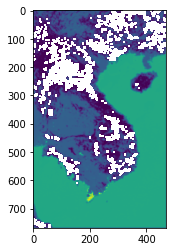

In [33]:
# Thử test ngày 16/2/2019 và trực quan hóa kết quả
output = test_date(datetime.datetime(2019, 2, 16))
plt.imshow(output)

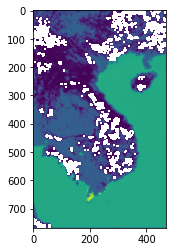

In [34]:
# Thử test ngày 18/4/2019 và trực quan hóa kết quả
output = test_date(datetime.datetime(2019, 4, 18))
plt.imshow(output)

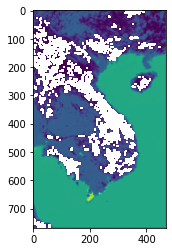

In [35]:
# Thử test ngày 15/11/2019 và trực quan hóa kết quả
output = test_date(datetime.datetime(2019, 11, 15))
plt.imshow(output)